## 02 첫번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

In [2]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값 :', iris_label)
print('iris target명 :', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size=0.2, random_state=11)

In [4]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [5]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


## 03 사이킷런의 기반 프레임워크 익히기

- 예제 데이터
  - sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
  
  
- 피처 처리
  - sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
  - sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
  - sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨.
  
  
- 피처 처리 & 차원 축소
  - sklearn.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈임. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능을 수행할 수 있음
  
  
- 데이터 분리 & 파라미터 튜닝
  - sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치로 최적 파라미터 추출 등의 API 제공
  
  
- 평가
  - sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공 / Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공


- ML알고리즘
  - sklearn.ensemble : 앙상블 알고리즘 제공 / 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공
  - sklearn.linear_model : 주로 선형 회귀, 릿지, 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원 / 또한 SGD 관련 알고리즘도 제공
  - sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공. 가우시안 NB, 다항 분포 NB 등
  - sklearn.neighbors : 최근접 이웃 알고리즘 제공. K-NN 등
  - sklearn.svm : 서포트 벡터 머신 알고리즘 제공
  - sklearn.tree : 의사결정트리 알고리즘 제공
  - sklearn.cluster : 비지도 클러스터링 알고리즘 제공(K-Means, 계층형, DBSCAN 등)
  
  
- 유틸리티
  - sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

- 분류나 회귀 연습용 예제 데이터
  - datasets.load_boston() : 회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
  - datasets.load_breast_cancer() : 분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
  - datasets.load_diabetes() : 회귀 용도이며, 당뇨 데이터 세트
  - datasets.load_digits() : 분류 용도이며, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
  - datasets.load_iris() : 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트
  - fetch 계열의 명령
    - fetch_covtype() : 회귀 분석용 토지 조사 자료
    - fetch_20newsgroups() : 뉴스 그룹 텍스트 자료
    - fetch_olivetti_faces() : 얼굴 이미지 자료
    - fetch_lfw_people() : 얼굴 이미지 자료
    - fetch_lfw_pairs() : 얼굴 이미지 자료
    - fetch_rcv1() : 로이터 뉴스 말뭉치
    - fetch_mldata() : ML 웹사이트에서 다운로드
    
- 분류와 클러스터링을 위한 표본 데이터 생성기
  - datasets.make_classifications() : 분류를 위한 데이터 세트를 만듭니다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해 줍니다.
  - datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성해 줍니다. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 줍니다.


- 사이킷런에 내장된 데이터 세트 구성 요소
  - data : 피처의 데이터 세트
  - target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
  - target_names : 개별 레이블의 이름
  - feature_names : 피처의 이름
  - DESCR : 데이터 세트에 대한 설명과 각 피처의 설명

In [7]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [8]:
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


## 04 Model Selection 모듈 소개

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
df_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data,train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도 :',accuracy_score(train_label,pred))

예측 정확도 : 1.0


- 예측 결과가 100%인 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문이다.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.3, random_state = 121)

df_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 1.0000


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붗꽃 데이터 세트 크리:', features.shape[0])

붗꽃 데이터 세트 크리: 150


### K 폴드 교차 검증

In [12]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 :  0.9


### Stratified K 폴드 
- 레이블 별로 동일하게 분류

In [13]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [14]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64


In [15]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iters = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iters += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test =  iris_df['label'].iloc[test_index]
    print('## 교차검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차검증 : 3
학습 레이블 데이터 분포 : 
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차검증 : 3
학습 레이블 데이터 분포 : 
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차검증 : 3
학습 레이블 데이터 분포 : 
 2    34
1    34
0    34
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    16
1    16
0    16
Name: label, dtype: int64


In [16]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.9804, 학습 데이터 크기 : 99, 검증 데이터 크기 : 51
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]

#2 교차 검증 정확도 : 0.9216, 학습 데이터 크기 : 99, 검증 데이터 크기 : 51
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133]

#3 교차 검증 정확도 : 0.9792, 학습 데이터 크기 : 102, 검증 데이터 크기 : 48
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.9804 0.9216 0.9792]
## 평균 검증 정확도 : 0.9604


### 교차 검증을 보다 간편하게 - cross_val_score()

- cross_val_score() API의 선언 형태
  - cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,
    pre_dispatch='2*n_jobs')
  - 이 중 estimator, X, y,  scoring, cv가 주요 파라미터

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accaccuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.9804 0.9216 0.9792]
평균 검증 정확도 : 0.9604


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- GridSearchCV 주요 파라미터
  - estimator : classifier, regressor, prpeline이 사용될 수 있습니다.
  - param_grid : key + 리스트 값을 가지는 딕셔너리가 주어집니다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.
  - scoring : 예측 성능을 측정할 평가 방법을 지정합니다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예 : 정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있습니다.
  - cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정합니다.
  - refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다.

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state = 121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}

In [19]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
# refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타냅니다.
- rank_test_score는 하이퍼 파라미터벼로 성능이 좋은 score 순위를 나타냅니다. 1이 가장 뛰어난 순위이며 이 때의 파라미터가 최적의 하이퍼 파라미터입니다.
- mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값입니다.

In [20]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [21]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


## 05 데이터 전처리

### 데이터 인코딩

- 레이블 인코딩(Label encoding)
- 원-핫 인코딩(One Hot encoding)

In [22]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본 값:', encoder.inverse_transform([0,1,2,3,4,5]))

# 레이블 인코딩의 문제점 : 선형회귀와 같은 수치의 중요도가 있는 ML 알고리즘에는 적용 X, 트리 계열의 ML 알고리즘은 문제 없다.
# 이러한 문제점을 해결하기 위한 인코딩 방식이 원-핫 인코딩(One-Hot Encoding)

인코딩 변환값: [0 1 4 5 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환.
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
# pandas로 구현
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### StandardScaler
- 개별 피처를 평균이 0, 분산이 1인 값으로 변환
- 서포트 벡터 머신, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화 적용이 예측 성능 향상에 중요한 요소가 될 수 있다.

In [25]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature 들의 평군 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평군 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [26]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

print('feature 들의 평군 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평군 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
- 데이터의 분포가 가우시안 분포가 아닐 경우에 사용가능

In [27]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

print('feature 들의 평군 값')
print(iris_df_scaled.min())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.max())

feature 들의 평군 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 06 사이킷런으로 수행하는 타이타닉 생존자 예측

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [30]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [31]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N                  687
C23 C25 C27          4
G6                   4
B96 B98              4
C22 C26              3
D                    3
E101                 3
F33                  3
F2                   3
C124                 2
F G73                2
B58 B60              2
B20                  2
B51 B53 B55          2
B18                  2
E33                  2
C65                  2
B49                  2
B5                   2
C78                  2
E44                  2
C52                  2
D36                  2
B28                  2
E25                  2
B35                  2
C92                  2
D26                  2
D33                  2
B57 B59 B63 B66      2
                  ... 
A32                  1
E68                  1
D7                   1
C90                  1
C45                  1
D9                   1
F E69                1
A19                  1
A34                  1

In [32]:
# Cabin(선실)의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳을 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [33]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

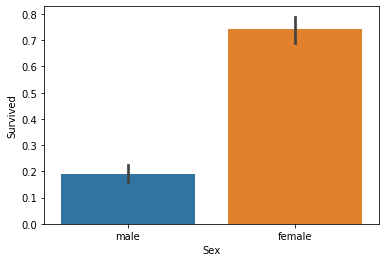

In [34]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

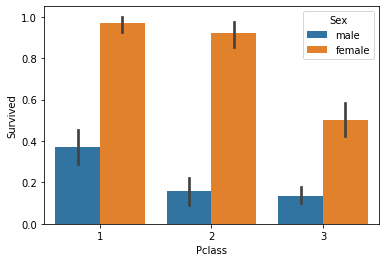

In [35]:
# 객실등급, 성별에 따른 생존확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

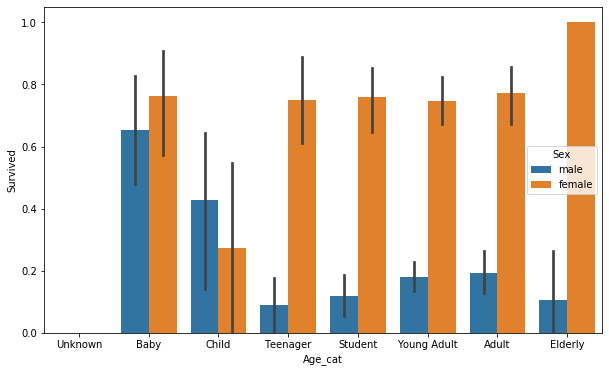

In [36]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y='Survived', hue = 'Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

#### 위 세개의 그래프를 봤을 때, Sex(성별), PClass(객실), age(나이)에 따라 생존이 다른 것을 확인 할 수 있다.

In [37]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)

# features 속성이 숫자형으로 바뀌었다.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [38]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [39]:
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,test_size=0.2,random_state=11)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisicRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도: 0.8324
LogisicRegression 정확도: 0.8659


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn.model_selection import KFold

def exec_kford(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classirier 학습, 예측, 정확도 계싼
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
        # 5개 fold에서의 평균 정확도 계산.
        mean_score = np.mean(scores)
        print('평균 정확도: {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kford(df_clf, folds=5)

교차 검증 0 정확도: 0.7430
평균 정확도: 0.7430
교차 검증 1 정확도: 0.7697
평균 정확도: 0.7563
교차 검증 2 정확도: 0.7921
평균 정확도: 0.7683
교차 검증 3 정확도: 0.7640
평균 정확도: 0.7672
교차 검증 4 정확도: 0.8315
평균 정확도: 0.7801


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7765
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8418
평균 정확도 : 0.7835


In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
